In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn')
from mpl_toolkits import mplot3d

In [2]:
xTrain=pd.read_csv("Training Data/Logistic_X_Train.csv")
yTrain=pd.read_csv("Training Data/Logistic_Y_Train.csv")

In [3]:
xTrain.head()

,f1,f2,f3
0,-1.239375,0.749101,-0.528515
1,-1.036070,0.801436,-1.283712
2,-0.615579,1.579521,-1.391927
3,1.335978,1.348651,1.433564
4,0.658925,1.300019,0.571603


In [4]:
yTrain.head()

,label
0,1
1,1
2,1
3,0
4,0


In [5]:

f1 = xTrain[['f1']].values
f2 = xTrain[['f2']].values
f3 = xTrain[['f3']].values
x = f1
x = np.hstack((f1,f2))
x = np.hstack((x,f3))
x.shape

(3000, 3)

In [6]:
np.hstack?

In [7]:
x=f1
x=np.hstack((f1,f2))
x=np.hstack((x,f3))
x.shape

(3000, 3)

In [8]:
f1 = f1.reshape((-1,))
f2 = f2.reshape((-1,))
f3 = f3.reshape((-1,))


In [9]:
y=yTrain.values
y=y.reshape(-1)

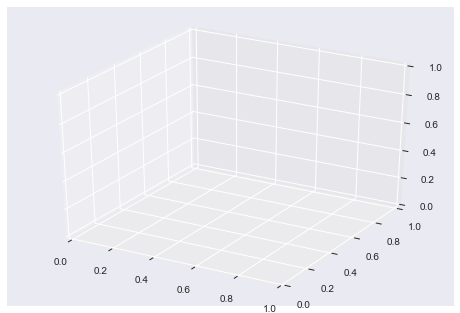

In [10]:
fig = plt.figure()
ax = plt.axes(projection="3d")

plt.show()

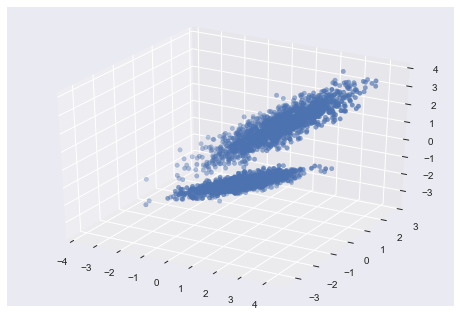

In [11]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(f2,f3,f1,  cmap='hsv')
plt.show()

In [12]:
def hypothesis(x,w,b):
    hx=np.dot(x,w)+b
    return sigmoid(hx)

In [13]:
def sigmoid(x):
    return 1.0/(1.0+ np.exp(-1.0*x))

In [14]:
def error(x,y,w,b):
    
    err=0.0
    m=x.shape[0]
    
    for i in range (m):
        hx=hypothesis(x[i],w,b)
        err += (y[i]*np.log2(hx)) + ((1-y[i])*np.log2(1-hx))
    
    return err/m

In [15]:
def gradient(x,y,w,b):
    
    grad_b=0.0
    grad_w=np.zeros(w.shape)
    m=x.shape[0]
    
    for i in range (m):
        hx=hypothesis(x[i],w,b)
        grad_b += (y[i]-hx)
        grad_w += ((y[i]-hx)*x[i])
        
    grad_b/=m
    grad_w/=m
    
    return [grad_w,grad_b]
    

In [16]:
def gradientAscent(x,y,w,b,learning_rate=0.01):
    
    err=error(x,y,w,b)
    [grad_w,grad_b]=gradient(x,y,w,b)
    
    w += learning_rate*grad_w
    b += learning_rate*grad_b
    
    return err,w,b


In [17]:
def predict(x,w,b):
    confidence = hypothesis(x,w,b)
    if(confidence > 0.5):
        return 1
    else:
        return 0

In [18]:
loss = []
acc = []

w = np.zeros((x.shape[1],))
b = 0

In [19]:
for i in range (10000):
    l,w,b = gradientAscent(x,y,w,b,learning_rate=0.1)
    loss.append(l)

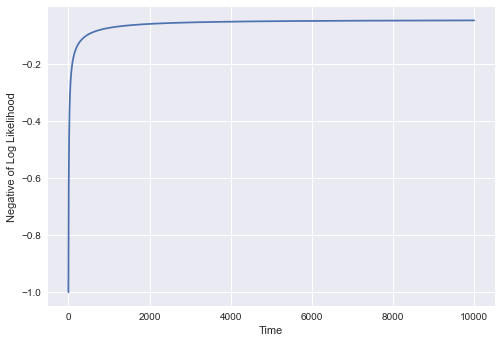

In [20]:
plt.plot(loss)
plt.ylabel("Negative of Log Likelihood")
plt.xlabel("Time")
plt.show()

In [21]:
xTest=pd.read_csv("Testing Data/Logistic_X_Test.csv")

In [22]:
f1_test = xTest[['f1']].values
f2_test = xTest[['f2']].values
f3_test = xTest[['f3']].values

f1_test = f1_test.reshape((-1,))
f2_test = f2_test.reshape((-1,))
f3_test = f3_test.reshape((-1,))

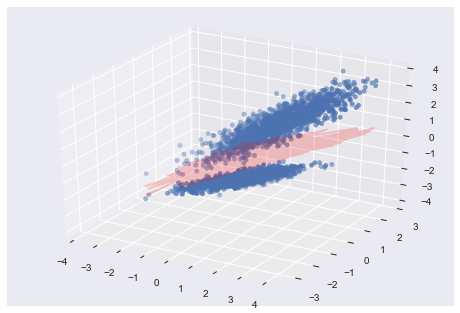

In [23]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(f2,f3,f1,  cmap='hsv')

xt= f2
yt= f3

zt= -(w[1]*xt + w[2]*yt + b)/w[0]

ax.plot3D(xt,yt,zt,color ='red',alpha = 0.2)
plt.show()

In [24]:
w

array([-3.9071653 ,  3.1072609 , -2.36873808])